# Python Probability Practice

## Simulating Coin Flips
Important Documentation:
- [Randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)
- [Random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# outcome of one coin flip
np.random.randint(2)

1

In [3]:
# outcomes of ten thousand coin flips
np.random.randint(2, size=10000)

array([0, 0, 0, ..., 1, 0, 1])

In [4]:
# mean outcome of ten thousand coin flips
np.random.randint(2, size=10000).mean()

0.4991

In [5]:
# outcome of one coin flip
np.random.choice([0, 1])

0

In [6]:
# outcome of ten thousand coin flips
np.random.choice([0, 1], size=10000)

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
# mean outcome of ten thousand coin flips
np.random.choice([0, 1], size=10000).mean()

0.5059

In [8]:
# outcomes of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2])

array([0, 0, 0, ..., 0, 1, 1])

In [9]:
# mean outcome of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2]).mean()

0.2048

in the example above, notice that the mean is closer to 0.2 as zero (or heads) will be chosen 80% of the time!

## Probability Quiz
In this quiz, you will simulate coin flips and die rolls to compute proportions for the following outcomes.

1. Two fair coin flips produce exactly two heads
2. Three fair coin flips produce exactly one head
3. Three biased coin flips with P(H) = 0.6 produce exactly one head
4. A die rolls an even number
5. Two dice roll a double

Then, you'll compare these proportions with probabilities in the quizzes below.

When simulating coin flips, use 0 to represent heads and 1 to represent tails. When simulating die rolls, use the correct integers to match the numbers on the sides of a standard 6 sided die.

### 1. Two fair coin flips produce exactly two heads
**Please note again that we are using 0 to represent heads, and 1 to represent tails.**

In [10]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))

# sums of all tests 
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 0).mean()

0.249832

In [11]:
test_sums

array([1, 0, 2, ..., 0, 1, 1])

why use axis 1 and not axis 0? 
using axis 1 will act on all the COLUMNS in each ROW
using axis 0 will act on all the ROWS in each COLUMN

This [Stackoverflow](https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean) discussion clarifies it
```+-----------+---------+--------+
|            |  A      |  B      |
+------------+---------+----------
|      0     | 0.626386| 1.52325 |----axis=1----->
+------------+---------+---------+
             |         |
             | axis=0  |
             ↓         ↓```

### 2. Three fair coin flips produce exactly one head
**Please note again that we are using 0 to represent heads, and 1 to represent tails.**

In [12]:
# simulate 1 million tests of three fair coin flips
tests = np.random.randint(2, size=(int(1e6), 3))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

0.375571

### 3. Three biased coin flips with P(H) = 0.6 produce exactly one head
**Please note again that we are using 0 to represent heads, and 1 to represent tails.**

In [13]:
# simulate 1 million tests of three biased coin flips
# hint: use np.random.choice()
tests = np.random.choice(2, size=(int(1e6), 3), p=[0.6, 0.4])

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

0.288295

### 4. A dice rolls an even number

In [14]:
# simulate 1 million tests of one die roll
tests = np.random.randint(1, 7, size=(int(10e6), 1))

# proportion of tests that produced an even number
(tests % 2 == 0).mean()

0.5000246

### 5. Two dice roll a double

In [15]:
# simulate the first million die rolls
first = np.random.randint(1, 7, size=(int(10e6), 1))

# simulate the second million die rolls
second = np.random.randint(1, 7, size=(int(10e6), 1))

# proportion of tests where the 1st and 2nd die rolled the same number
(first == second).mean()

0.1665845

## Simulating Many Coin Flips

Important Documentation:
- [Binomial Distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)

In [16]:
# number of heads from 10 fair coin flips using np.random.binomial
np.random.binomial(10, 0.5)

6

In [17]:
# number of heads from 10 fair coin flips using np.random.randint
tests = np.random.choice(2, size=(10, 1))
tests_sum = tests.sum()
tests.sum()

4

In [18]:
# results from 20 tests with 10 coin flips
np.random.binomial(10, 0.5, 20)

array([6, 5, 5, 8, 6, 3, 5, 4, 8, 7, 4, 6, 4, 3, 2, 4, 5, 5, 3, 6])

In [19]:
# mean number of heads from the 20 tests
np.random.binomial(10, 0.5, 20).mean()

5.25

In [20]:
# reflects the fairness of the coin more closely as # tests increases
np.random.binomial(10, 0.5, int(1e6)).mean()

4.996973

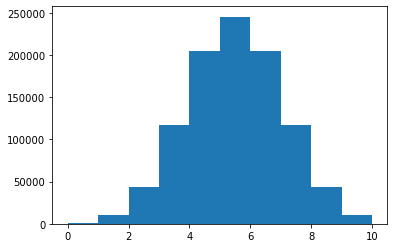

In [21]:
plt.hist(np.random.binomial(10, 0.5, int(1e6)));

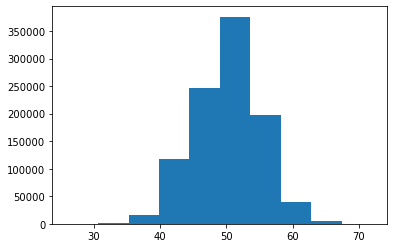

In [22]:
# gets more narrow as number of flips increase per test
plt.hist(np.random.binomial(100, 0.5, 1000000));

## Binomial Distributions Quiz
In this quiz, you will simulate coin flips using np.random.binomial to compute proportions for the following outcomes.

1. A fair coin flip produces heads
2. Five fair coin flips produce exactly one head
3. Ten fair coin flips produce exactly four heads
4. Five biased coin flips with P(H) = 0.8 produce exactly five heads
5. Ten biased coin flips with P(H) = 0.15 produce at least three heads

Then, you'll compare these proportions with probabilities in the quizzes below.

### 1. A fair coin flip produces heads

In [23]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.500402

### 2. Five fair coin flips produce exactly one head

In [24]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5, 0.5, int(1e6))
# proportion of tests that produced 1 head

(tests == 1).mean()

0.155836

In [25]:
# checking using np.random.randint
tests = np.random.randint(2, size=(int(1e6), 5))
tests_sum = tests.sum(axis=1)

(tests_sum == 1).mean()

0.155949

### 3. Ten fair coin flips produce exactly four heads

In [26]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10, 0.5, int(1e6))

# proportion of tests that produced 4 heads
(tests == 4).mean()

0.204639

In [27]:
# checking using np.random.randint
tests = np.random.randint(2, size=(int(1e6), 10))
tests_sum = tests.sum(axis=1)

(tests_sum == 4).mean()

0.205522

### 4. Five biased coin flips with P(H) = 0.8 produce exactly five heads

In [28]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5, 0.8, int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

0.327613

In [29]:
# checking using np.random.choice
tests = np.random.choice((0, 1), p=[0.2, 0.8], size=(int(1e6), 5))
tests_sum = tests.sum(axis=1)

(tests_sum == 5).mean()

0.327806

### 5. Ten biased coin flips with P(H) = 0.15 produce at least 3 heads

In [30]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10, 0.15, int(1e6))

# proportion of tests that produced at least 3 heads
(tests >= 3).mean()

0.179695

In [31]:
# checking using np.random.choice
tests = np.random.choice((0, 1), p=[0.85, 0.15], size=(int(1e6), 10))
tests_sum = tests.sum(axis=1)

(tests_sum >= 3).mean()

0.179676

## Cancer Test Results
In this section, you'll find a simulated dataset on cancer test results for patients and whether they really have cancer. Explore cancer_test_data.csv in the Jupyter notebook to answer the following questions.

- How many patients are there in total?
- How many patients have cancer?
- How many patients do not have cancer?
- What proportion of patients has cancer?
- What proportion of patients doesn't have cancer?
- What proportion of patients with cancer test positive?
- What proportion of patients with cancer test negative?
- What proportion of patients without cancer test positive?
- What proportion of patients without cancer test negative?

In [32]:
# load dataset
df = pd.read_csv('support-files/8_Python-Probability-Practice/cancer_test_data.csv')
df.head()

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [33]:
# number of patients
num = df.shape[0]
num

2914

In [34]:
df['has_cancer'].dtypes

dtype('bool')

In [35]:
# number of patients with cancer
has_cancer = df.query('has_cancer == True')
num_cancer = has_cancer.shape[0]
num_cancer

306

In [36]:
# number of patients without cancer
not_cancer = df.query('has_cancer == False')
num_not_cancer = not_cancer.shape[0]
num_not_cancer

2608

In [37]:
# proportion of patients with cancer
proportion_cancer = num_cancer / num
proportion_cancer

0.10501029512697323

In [38]:
# proportion of patients without cancer
proportion_not_cancer = num_not_cancer / num
proportion_not_cancer

0.8949897048730268

In [39]:
# proportion of patients with cancer who test positive
has_cancer['test_result'].unique()

array(['Positive', 'Negative'], dtype=object)

In [40]:
has_cancer.query('test_result == "Positive"').shape[0] / num_cancer

0.9052287581699346

In [41]:
# proportion of patients with cancer who test negative
has_cancer.query('test_result == "Negative"').shape[0] / num_cancer

0.09477124183006536

In [42]:
# proportion of patients without cancer who test positive
not_cancer.query('test_result == "Positive"').shape[0] / num_not_cancer

0.2036042944785276

In [43]:
# proportion of patients without cancer who test negative
not_cancer.query('test_result == "Negative"').shape[0] / num_not_cancer

0.7963957055214724

## Conditional Probability & Bayes Rule Quiz
In the previous section, you found the following proportions from the cancer results dataset.

- Patients with cancer: **0.105**
- Patients without cancer: **0.895**
- Patients with cancer who tested positive: **0.905**
- Patients with cancer who tested negative: **0.095**
- Patients without cancer who tested positive: **0.204**
- Patients without cancer who tested negative: **0.796**

Based on the above proportions observed in the data, we can assume the following probabilities.

Probability	
- P(cancer) = 0.105 Probability a patient has cancer
- P(~cancer) = 0.895	Probability a patient does not have cancer
- P(positive|cancer) = 0.905	Probability a patient with cancer tests positive
- P(negative|cancer) = 0.095	Probability a patient with cancer tests negative
- P(positive|~cancer) = 0.204	Probability a patient without cancer tests positive
- P(negative|~cancer) = 0.796	Probability a patient without cancer tests negative

#### Quiz Questions
Use the probabilities given above and Bayes rule to compute the following probabilities.

1. Probability a patient who tested positive has cancer, or P(cancer|positive)
2. Probability a patient who tested positive doesn't have cancer, or P(~cancer|positive)
3. Probability a patient who tested negative has cancer, or P(cancer|negative)
4. Probability a patient who tested negative doesn't have cancer, or P(~cancer|negative)

In [44]:
df.head()

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [45]:
# What proportion of patients who tested positive have cancer?
df.query('test_result == "Positive"')['has_cancer'].mean()

0.34282178217821785

In [46]:
# What proportion of patients who tested positive don't have cancer?
1 - df.query('test_result == "Positive"')['has_cancer'].mean()

0.6571782178217822

In [47]:
# What proportion of patients who tested negative have cancer?
df.query('test_result == "Negative"')['has_cancer'].mean()

0.013770180436847104

In [48]:
# What proportion of patients who tested negative don't have cancer?
1- df.query('test_result == "Negative"')['has_cancer'].mean()

0.9862298195631529